In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import glob

from IPython.display import Audio
import soundfile as sf
import librosa
import scipy

In [ ]:
librosa.frames_to_samples(

# Importar as bases de dados

In [2]:
noisefiles = glob.glob('../../bases_vozes/urbansound_8k/*.wav')
files = glob.glob('../../bases_vozes/Base_Vozes_IFPB/banco de vozes_mono/vozes_nome/Vozes Mono/**/*.wav')

print(f'Quantidade de ruido {len(noisefiles)}')
print(f'Quantidade de sons {len(files)}')

Quantidade de ruido 8732
Quantidade de sons 91


## Exemplo de fala

In [77]:
rand_int = np.random.randint(0, len(files)-1)
y, fs = librosa.load(files[rand_int])
samples = len(y)
length = samples/fs
print(rand_int)
print(f'Quantidade de amostras: {samples} amostras')
print(f'Taxa de amostragem: {fs}Hz')
print(f'Número de canais: {len(y.shape)}')
print(f'Tamanho do sinal: {length}s')

73
Quantidade de amostras: 19083 amostras
Taxa de amostragem: 22050Hz
Número de canais: 1
Tamanho do sinal: 0.8654421768707483s


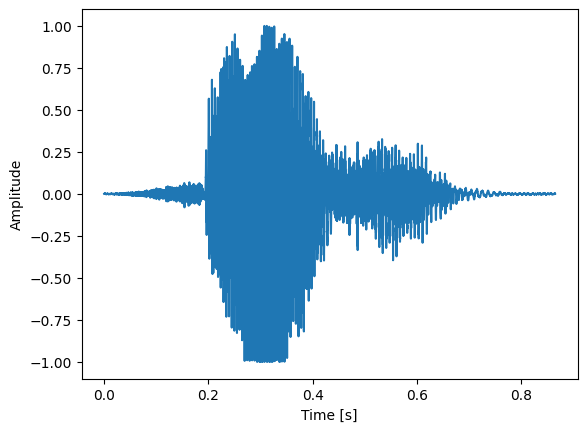

In [78]:
time = np.linspace(0., length, y.shape[0])
plt.plot(time, y)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [13]:
Audio(y, rate=fs)

## Exemplo de ruído

In [80]:
rand_int = np.random.randint(0, len(noisefiles)-1)
y_noise, fs = librosa.load(noisefiles[87])
samples = len(y_noise)
length = samples/fs

print(rand_int)
print(f'Quantidade de amostras: {samples} amostras')
print(f'Taxa de amostragem: {fs}Hz')
print(f'Número de canais: {len(y_noise.shape)}')
length = samples/fs
print(f'Tamanho do sinal: {length}s')

1750
Quantidade de amostras: 78278 amostras
Taxa de amostragem: 22050Hz
Número de canais: 1
Tamanho do sinal: 3.5500226757369613s


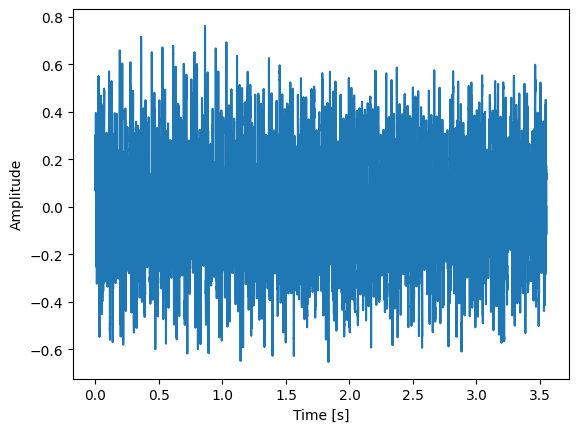

In [81]:
time = np.linspace(0., length, y_noise.shape[0])
plt.plot(time, y_noise)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [82]:
Audio(y_noise, rate=fs)

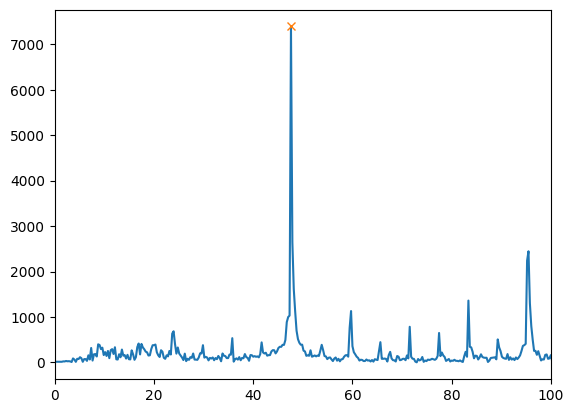

Frequencia fundamental : 47.605329722271904 Hz


In [224]:
yk = abs(np.fft.rfft(y_noise))
freqs = np.arange(len(yk))
freqs = freqs * fs / samples

plt.plot(freqs, yk)
plt.xlim([0, 100])
plt.plot(np.where(yk == max(yk))[0][0]*fs/samples, np.max(yk), "x")
#plt.axvline(x = 45.6, color = 'r')
#plt.axvline(x = 49.6, color = 'r')
plt.show()
print(f'Frequencia fundamental : {np.where(yk == max(yk))[0][0]*fs/samples} Hz')

In [225]:
noisefiles[87]

'../../bases_vozes/urbansound_8k/17578-5-0-35.wav'